# Lab 3: Introduction to Discrete Distribution and Continuous Distribution

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print ("Modules Imported!")

Modules Imported!


## Creating Probability Distribution Objects for Discrete Distributions

The scipy stats package contains a number of functions for using and analyzing distributions.  Two of its classes are rv_discrete and rv_continous, for discrete type and for continuous type distributions, respectively.   A discrete probability distribution is specified by a set of possible numerical values, $c_1,c_2, \ldots $ and associated probabilities for the values, $p_1, p_2, \ldots $ which sum to one.  The *probability mass function* $p$ for the distribution is defined by $p(c_i)=p_i$ for all $i,$  and $p(c)=0$ for values $c$ not in the  list of possible values.   A random variable $X$ has such a discrete distribution if $P\{X = u\} = p(u)$ for all $u.$  For example, if $X$ represents the number showing on a roll of a fair die, then the vector of values is (1,2,3,4,5,6) and the vector
of associated probabilities is $\left( \frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6}\right).$

There are several important families of discrete probability distributions that frequently arise in applications.
A very basic example is the Bernoulli distribution with parameter $p,$  where $0\leq p \leq 1.$
The distribution assigns probability $p$ to value 1, and probability $1-p$ to value 0. If a random variable $X$ has the
Bernoulli distribution with parameter $p$, we call $X$ a *Bernoulli random variable* with parameter $p,$ and we write
$X \sim Bernoulli(p).$   For example, if $X \sim Bernoulli(\frac{1}{4}),$ then $P\{X = 1\}=\frac{1}{4}$ and
$P\{X = 0\}=1-\frac{1}{4} = \frac{3}{4}$.  There is zero probability that $X$ is any value other than $1$ or $0$.  The class rv_discrete within the scipy stats package is for working with general discrete type random variables, with many instances of the class corresponding to particular well known probability distribuions.  It gives a convenient way to compute the mean, variance, pmf, and other attributes for a given distribution, and for generating random variates, using random number generators, with the given distribution.

For example, one instance of the rv_discrete class is the object for the Bernoulli distribution.  By specifying (aka freezing) a value for the parameter $p$ we create a more specialized instance of a rv_discrete class.  The cumulative distribution function (CDF) of a random variable $X$ is the function $F_X$ defined by $F_X(c)=P\{X\leq c\}$ for any real value of $c.$ In general, the CDF $F_X(c)$ is nondecreasing in $c$ with limit 0 at $-\infty$ and 1 at $+\infty.$   The CDF for the $Bernoulli(\frac{1}{4})$ distribution has a jump of size 3/4 at zero and a jump of size 1/4 at one.

Mean: 0.25
Var: 0.1875


(np.float64(-4.0), np.float64(4.0), np.float64(0.0), np.float64(1.05))

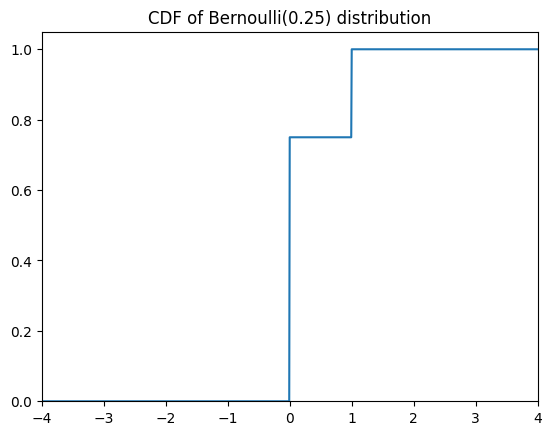

In [2]:
p = 1./4 #Sets the probability, uses decimal to create double (not integer)
bernoulli25 = st.bernoulli(p) #Generates object for Bernoulli(0.25) distribution
x = np.linspace(-4,4,1001) #Generates a vector on [-4,4] with 1001 points in it
print ('Mean:', bernoulli25.mean())  #Prints the mean (aka expected value) for the distribution
print ('Var:', bernoulli25.var())   #Prints the variance of X
plt.plot(x,bernoulli25.cdf(x))  #Creates a graph of the cumulative distribution fucntion (CDF)  of X
plt.title('CDF of Bernoulli(0.25) distribution')
plt.axis([-4, 4, 0, 1.05]) #Sets bounds on the plot axis

Above, we were able to create our Bernoulli distribution through scipy.stats. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the scipy.stats package do the following:
<html>
    <body>
        <ol>
            <li> Print the mean and standard deviation of a Bernoulli variable where $p=\frac{14}{17}$ .  [Tip: If you type the name of an object followed by a period, such as bernoulli25.  in a code cell and then press the tab key, a list of methods for that object is displayed.]</li>
            <li> Create a graph of the cumulative distribution function (CDF).  Try adapting the code in the previous cell to plot the CDF.  What happens if you change np.linspace(-5,5,1001) to np.linspace(-5,5,1000)? Can you explain why?
            </li>
        </ol>
    </body>
</html>

Mean for Q1: 0.8235294117647058
Variance for Q1: 0.1453287197231834


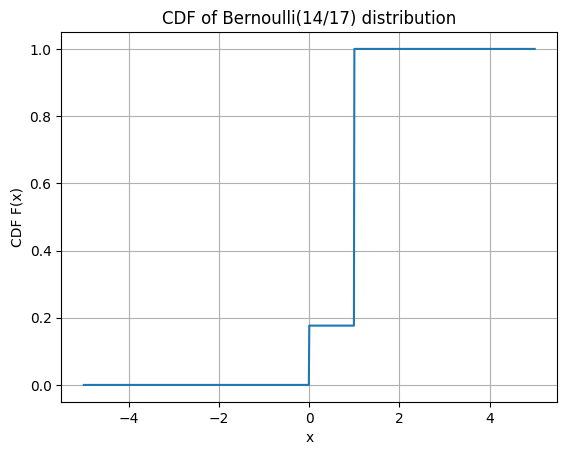

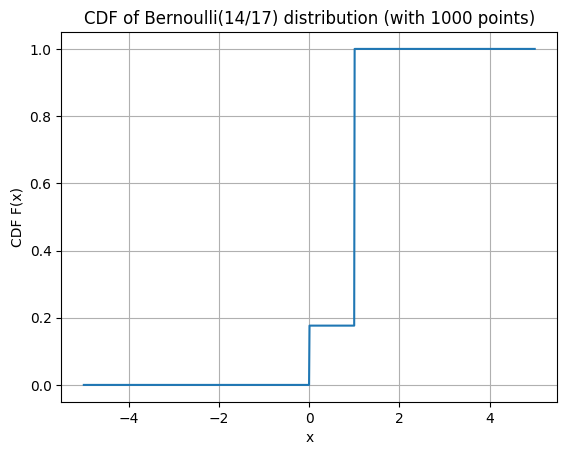

In [3]:
########Student Answer##############
# For Question 1
p = 14/17
bernoulli_Q1 = st.bernoulli(p)
print('Mean for Q1:', bernoulli_Q1.mean())
print('Variance for Q1:', bernoulli_Q1.var())

# For Question 2
x = np.linspace(-5, 5, 1001)
plt.plot(x, bernoulli_Q1.cdf(x))
plt.title('CDF of Bernoulli(14/17) distribution')
plt.xlabel('x')
plt.ylabel('CDF F(x)')
plt.grid(True)
plt.show()

x = np.linspace(-5, 5, 1000)
plt.plot(x, bernoulli_Q1.cdf(x))
plt.title('CDF of Bernoulli(14/17) distribution (with 1000 points)')
plt.xlabel('x')
plt.ylabel('CDF F(x)')
plt.grid(True)
plt.show()

**Explanation for the difference**: When using `np.linspace (-5,5,1000)`, there are even number of points, the generated sequence has no `0` point. Therefore, the initial vertical line will be replaced by a line with finite slope.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

Now what if we wanted to create a distribution object of our own? One way to do this is to use
SciPy's rv_discrete class.  In order to have a discrete RV, we need to specify the probability for any value our RV can be, so we create two vectors (we acutally use python tuples, numpy arrays would also work). The first is a vector of probabilities. Let $p =p_1,p_2,...,p_m$ where $\sum_{i=1}^m {p_i}=1$. The second is a vector of values. Let $c=c_1,c_2,...,c_m$ such that $P\{X=c_i\}=p_i$. These two vectors specify the pmf.  The custom probability distribution object can be created, and then used as before: 

Mean: 5.2
Var: 12.279999999999998


Text(0.5, 1.0, 'CDF of Xcstm')

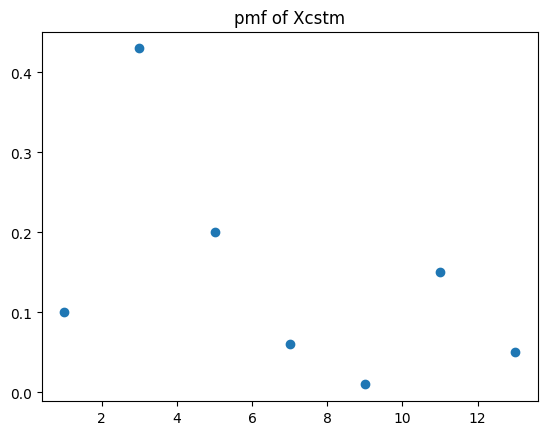

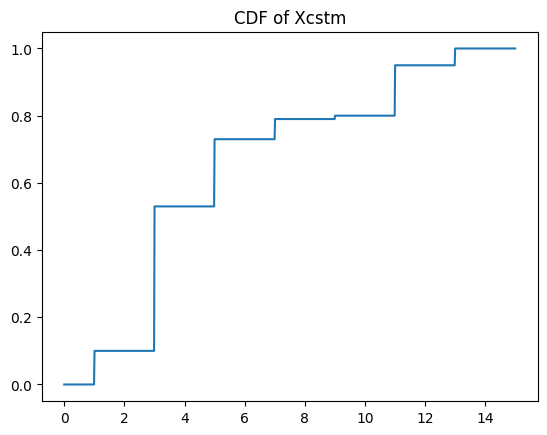

In [4]:
p = (.1,.43,.2,.06,.01,.15,.05) #Vector of probabilities (as a tuple)
c = (1,3,5,7,9,11,13) #Vector of values (as a tuple)
Xcstm = st.rv_discrete(values=(c,p)) #Creates an instance (aka object) of rv_discrete from our vectors
print ('Mean:', Xcstm.mean())
print ('Var:', Xcstm.var())
plt.plot(c,Xcstm.pmf(c),'o') #Plots the pmf. The 'o' indicates to plot the points discretely as circles
plt.title('pmf of Xcstm')
plt.figure() #Let us be able to plot another graph below the first
n = np.linspace(0,15,1000)
plt.plot(n,Xcstm.cdf(n))
plt.title('CDF of Xcstm')

<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Consider the random variable $X$ representing the sum of the outcomes when rolling two fair six-sided dice. For example, if you roll a 2 and a 5, the sum is 7.

<html>
    <body>
        <ol>
            <li>First, determine the vector of possible values, $c$, that the sum $X$ can take. Then, determine the corresponding vector of probabilities, $p$. <b>Hint:</b> There are 36 total possible outcomes when rolling two dice. The probability of rolling a sum of 2 is 1/36, a sum of 3 is 2/36, and so on.</li>
            <li>Create your own discrete random variable object to represent the sum of two dice rolls using your calculated $c$ and $p$ vectors.</li>
            <li>Print out the mean (also known as the expected value) of this distribution.</li>
            <li>Graph the pmf and CDF of this distribution.</li>
        </ol>
    </body>
</html>

Mean of the sum of two dice: 6.999999999999998


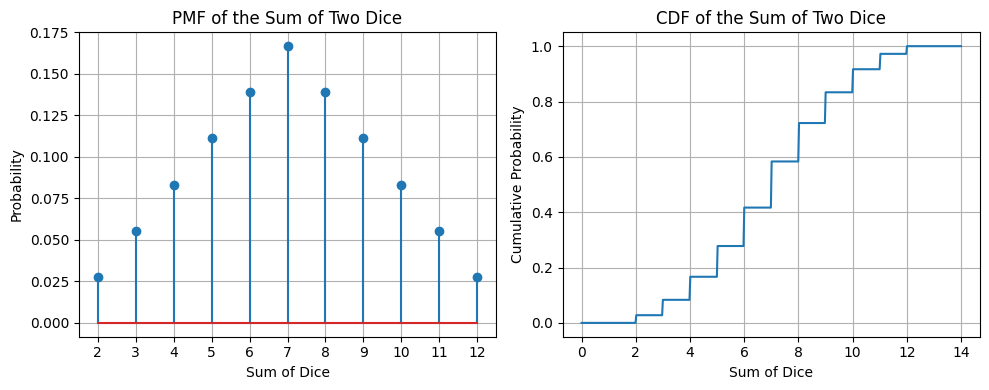

In [5]:
########Student Answer##############
# Question 1: Determine c and p
c = np.arange(2, 13)
p = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36.0

# Question 2: Create the discrete random variable object
dice_sum = st.rv_discrete(values=(c, p))

# Question 3: Calculate the mean of the distribution
print('Mean of the sum of two dice:', dice_sum.mean())

# Question 4: Graph the pmf and CDF
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.stem(c, dice_sum.pmf(c))
plt.title('PMF of the Sum of Two Dice')
plt.xlabel('Sum of Dice')
plt.ylabel('Probability')
plt.xticks(c)
plt.grid(True)

plt.subplot(1, 2, 2)
x_cdf = np.linspace(0, 14, 500)
plt.plot(x_cdf, dice_sum.cdf(x_cdf))
plt.title('CDF of the Sum of Two Dice')
plt.xlabel('Sum of Dice')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Creating Probability Distribution Objects for Continuous Distributions

A continuous random variable is one that can take any value in an interval. Its probability distribution is described by a *probability density function* (PDF), denoted by $f(x)$. Unlike the discrete case, the PDF $f(x)$ does not give the probability that the variable is equal to $x$. For a continuous random variable $X$, the probability of it taking on any specific value is zero (i.e., $P\{X=c\}=0$). Instead, the probability is found by integrating the PDF over an interval. The probability that $X$ falls in an interval $[a,b]$ is given by $P\{a \le X \le b\} = \int_a^b f(x)dx$.

The *cumulative distribution function* (CDF), $F(c) = P\{X \le c\}$, is found by integrating the PDF from $-\infty$ to $c$: $F(c) = \int_{-\infty}^c f(x)dx$.

The **Normal (or Gaussian) distribution** is arguably the most important continuous distribution. It is characterized by its iconic bell shape and is defined by two parameters: the mean ($\mu$) and the standard deviation ($\sigma$). The mean determines the center of the peak, and the standard deviation determines the spread of the curve. The `scipy.stats` package provides an object for this called `st.norm`. To specify the parameters, you use `loc` for the mean ($\mu$) and `scale` for the standard deviation ($\sigma$).

Mean: 0.0
Var: 1.0


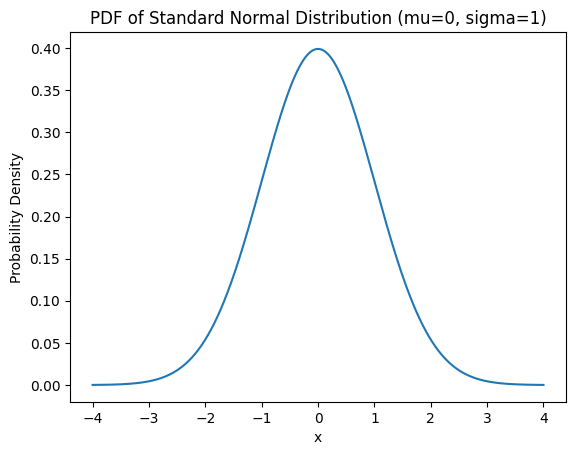

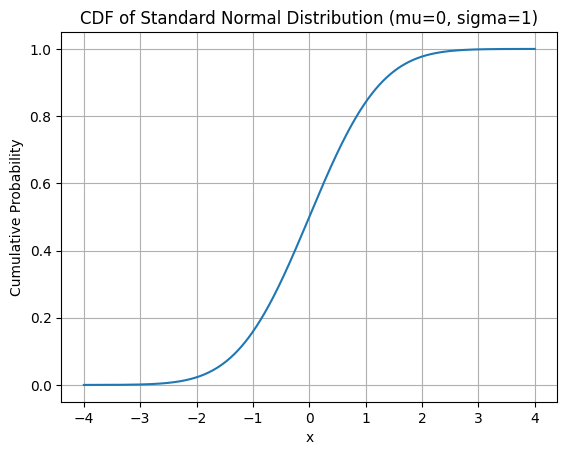

In [6]:
# Example for a Standard Normal Distribution, where mu=0 and sigma=1
mu_ex = 0
sigma_ex = 1
norm_dist_example = st.norm(loc=mu_ex, scale=sigma_ex)

# Print Mean and Variance. Note that variance is sigma^2.
print ('Mean:', norm_dist_example.mean())
print ('Var:', norm_dist_example.var())

# Plot the PDF
x = np.linspace(-4, 4, 1000)
plt.plot(x, norm_dist_example.pdf(x))
plt.title('PDF of Standard Normal Distribution (mu=0, sigma=1)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.figure()

# Plot the CDF
plt.plot(x, norm_dist_example.cdf(x))
plt.title('CDF of Standard Normal Distribution (mu=0, sigma=1)')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.grid()

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** Suppose the heights of a population of adult males are normally distributed with a mean of $\mu = 175$ cm and a standard deviation of $\sigma = 8$ cm.

<html>
    <body>
        <ol>
            <li>Using <code>scipy.stats.norm</code>, create a distribution object that represents the heights of this population.</li>
            <li>Print out the mean and the variance of this distribution.</li>
            <li>Graph the PDF and the CDF of this distribution. A reasonable range for the x-axis would be from 145 to 205.</li>
            <li>Calculate and print the probability that a randomly selected male from this population has a height between 167 cm and 183 cm. This is $P(167 \le X \le 183)$. <b>Hint:</b> This can be calculated as $F(183) - F(167)$, where $F$ is the CDF.</li>
        </ol>
    </body>
</html>

Mean of height distribution: 175.0
Variance of height distribution: 64.0


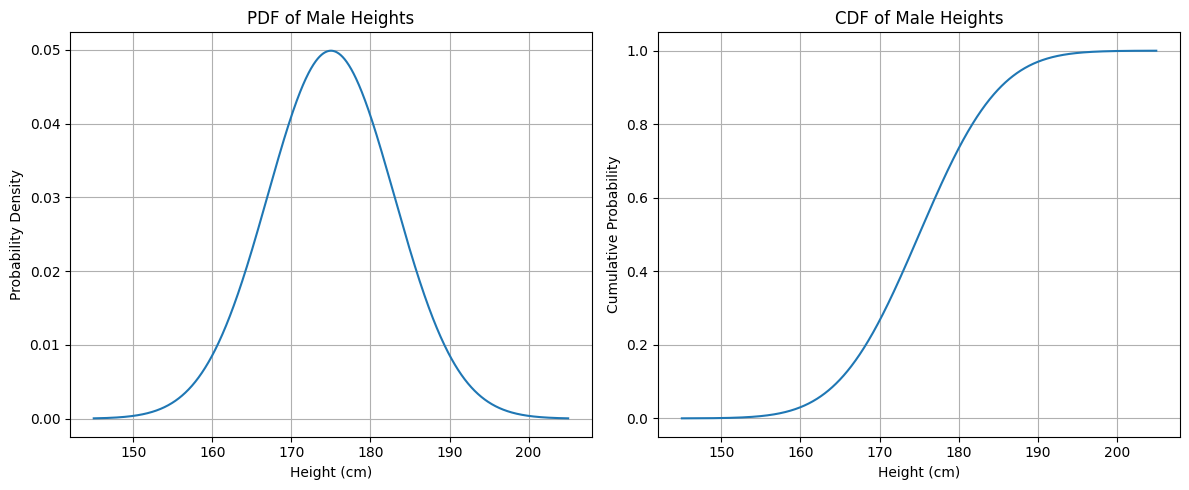

The probability ranges between 167 cm and 183 cm is: 0.6827


In [7]:
########Student Answer##############
# Question 1: Create a normal distribution object
mu = 175
sigma = 8
height_dist = st.norm(loc=mu, scale=sigma)

# Question 2: Print out the mean and variance
print("Mean of height distribution:", height_dist.mean())
print("Variance of height distribution:", height_dist.var())

# Question 3: Graph the PDF and CDF
x = np.linspace(145, 205, 1001)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, height_dist.pdf(x))
plt.title('PDF of Male Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, height_dist.cdf(x))
plt.title('CDF of Male Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

# Question 4: Calculate the probability in [167, 183]
prob_between = height_dist.cdf(183) - height_dist.cdf(167)
print(f"The probability ranges between 167 cm and 183 cm is: {prob_between:.4f}")

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 